<a href="https://colab.research.google.com/github/putriayualc/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 3.
Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

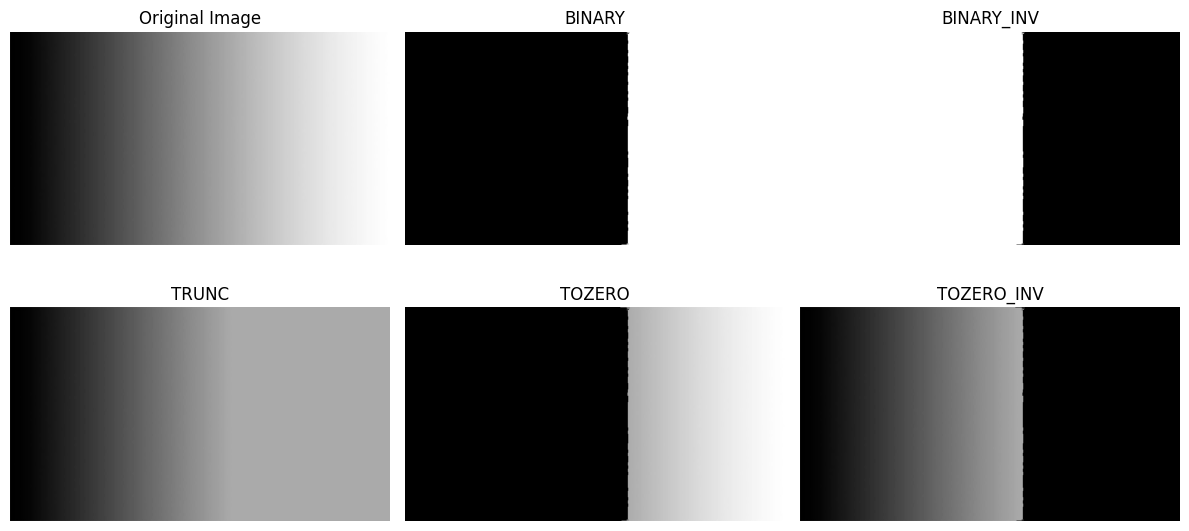

In [ ]:
# Membaca gambar gradasi dari path dan konversi ke grayscale
gradient = cv2.imread('/content/drive/MyDrive/PCVK/img/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Tentukan nilai threshold
threshold = 170

# Thresholding secara manual
binary = np.where(gradient > threshold, 255, 0).astype(np.uint8)
binary_inv = np.where(gradient > threshold, 0, 255).astype(np.uint8)
trunc = np.where(gradient > threshold, threshold, gradient).astype(np.uint8)
tozero = np.where(gradient > threshold, gradient, 0).astype(np.uint8)
tozero_inv = np.where(gradient > threshold, 0, gradient).astype(np.uint8)

# Tampilkan hasil menggunakan matplotlib
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### 4.
Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu's, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu's dengan global threshold biasa)

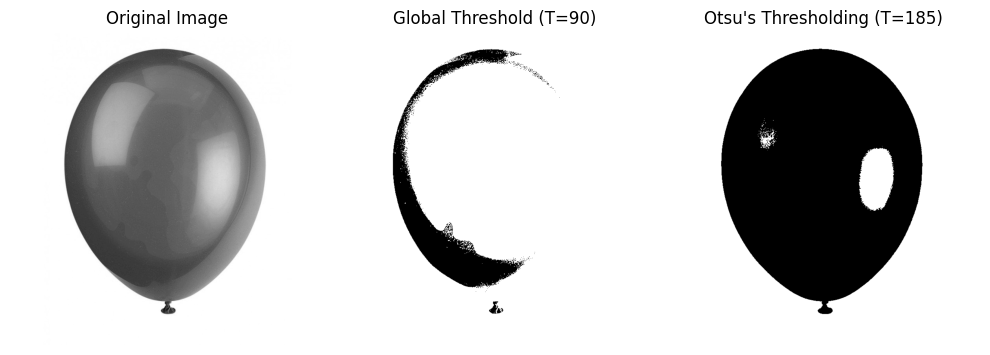

In [10]:
# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/img/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Fungsi untuk menghitung Otsu's Threshold secara manual
def otsu_threshold(image):
    # Histogram untuk menghitung frekuensi piksel (256 intensitas)
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    total = image.size

    current_max = 0
    threshold = 0
    sum_total = np.sum(np.arange(256) * hist)
    sum_foreground = 0
    weight_background = 0
    weight_foreground = 0

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue

        weight_foreground = total - weight_background
        if weight_foreground == 0:
            break

        sum_foreground += i * hist[i]
        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        # Variance between class
        variance_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Memilih threshold dengan nilai varians terbesar
        if variance_between > current_max:
            current_max = variance_between
            threshold = i

    return threshold

# Menghitung nilai threshold Otsu secara manual
otsu_thresh = otsu_threshold(image)

# Terapkan threshold global biasa dengan nilai Otsu yang diperoleh
global_threshold = np.where(image > otsu_thresh, 255, 0).astype(np.uint8)

# Tampilkan hasil menggunakan matplotlib
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Menampilkan gambar dengan threshold global (contoh: threshold = 127)
global_thresh_90 = np.where(image > 90, 255, 0).astype(np.uint8)
plt.subplot(1, 3, 2)
plt.imshow(global_thresh_90, cmap='gray')
plt.title('Global Threshold (T=90)')
plt.axis('off')

# Menampilkan gambar dengan threshold Otsu
plt.subplot(1, 3, 3)
plt.imshow(global_threshold, cmap='gray')
plt.title(f'Otsu\'s Thresholding (T={otsu_thresh})')
plt.axis('off')


plt.tight_layout()
plt.show()


### 5
Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:  
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.  
b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html  
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

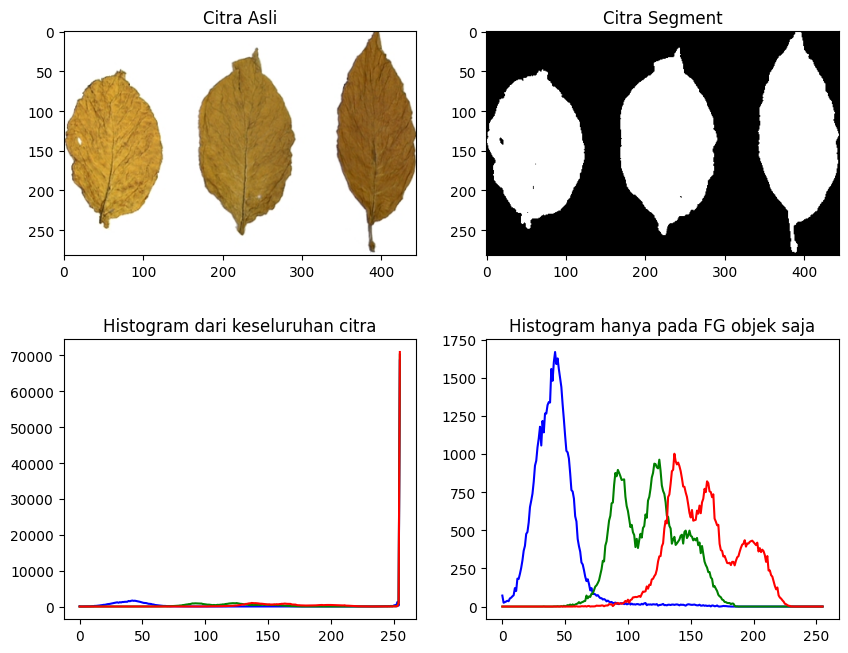

In [25]:
# Muat gambar asli dan ubah ke grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/img/tobacco.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold gambar untuk membuat mask
_, mask = cv2.threshold(gray, 185, 255, cv2.THRESH_BINARY_INV)

# Hitung histogram untuk keseluruhan gambar
hist_full = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Hitung histogram hanya pada bagian foreground (menggunakan mask)
hist_masked = cv2.calcHist([image], [0, 1, 2], mask, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Tampilkan gambar dan histogram
plt.figure(figsize=(10, 8))

# Gambar asli
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Gambar tersegmentasi (mask)
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')

# Histogram RGB untuk keseluruhan citra
plt.subplot(2, 2, 3)
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist_full = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist_full, color=color)
plt.title('Histogram dari keseluruhan citra')

# Histogram RGB hanya untuk foreground (menggunakan mask)
plt.subplot(2, 2, 4)
for i, color in enumerate(colors):
    hist_masked = cv2.calcHist([image], [i], mask, [256], [0, 256])
    plt.plot(hist_masked, color=color)
plt.title('Histogram hanya pada FG objek saja')

plt.show()


### 6.
Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

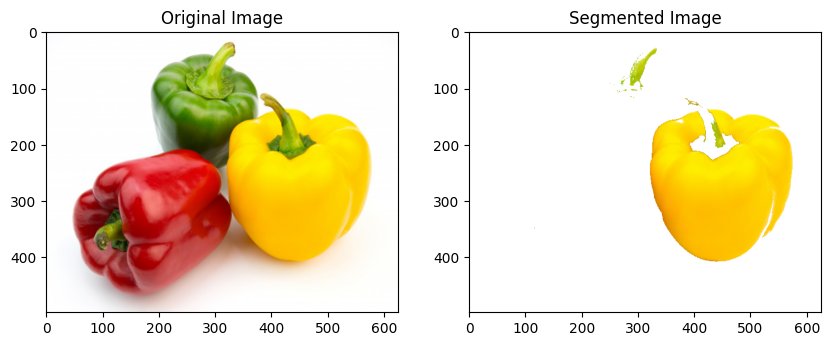

In [ ]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/img/peppers.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape gambar ke 2D array (untuk K-Means)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Kriteria K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Jumlah cluster
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Ubah nilai pusat cluster menjadi integer dan kembali ke bentuk aslinya
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Konversi gambar segmentasi ke HSV untuk lebih mudah mengisolasi warna kuning
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2HSV)

# Tentukan rentang warna kuning
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Buat masker untuk warna kuning
mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Buat latar belakang putih
white_background = np.ones_like(image, dtype=np.uint8) * 255

# Gabungkan gambar yang tersegmentasi dengan latar belakang putih
# Hanya area warna kuning yang ditampilkan, lainnya menjadi putih
final_image = np.where(mask[:, :, np.newaxis] == 0, white_background, image)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title('Segmented Image')

plt.show()


### 7.
Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

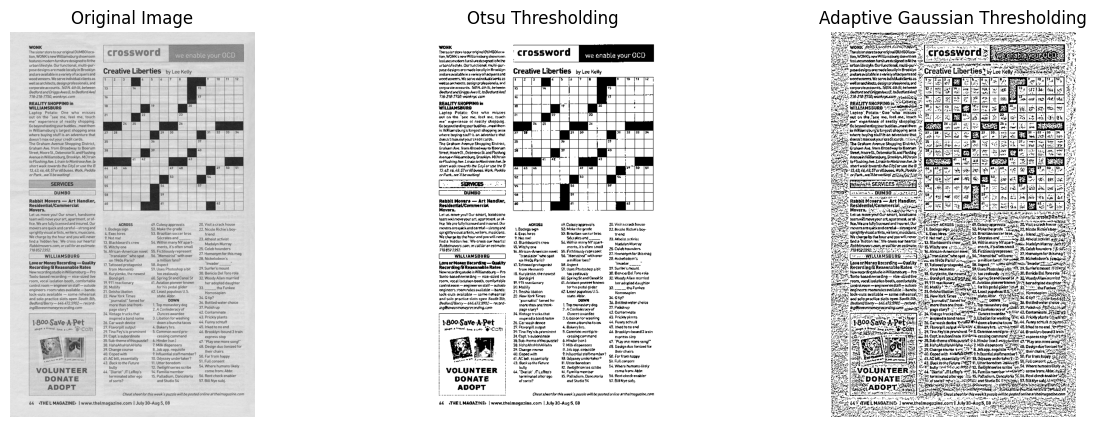

In [ ]:

# Baca gambar dalam mode grayscale (pastikan path benar)
image = cv2.imread('/content/drive/MyDrive/PCVK/img/crossword.jpg', cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    print("Error: Gambar tidak ditemukan. Pastikan path ke file 'crossword.jpg' benar.")
else:
    # Thresholding biner menggunakan metode Otsu
    _, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Thresholding adaptif dengan Gaussian
    adaptive_threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY, 11, 2)

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title('Otsu Thresholding')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(adaptive_threshold, cmap='gray')
    plt.title('Adaptive Gaussian Thresholding')
    plt.axis('off')

    plt.show()
